# semseg/predict

based on [camvid.ipynb](./camvid.ipynb).

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

from abcli import fullname
from abcli import string
from abcli.modules import objects
from abcli.plugins import seed
from abcli.plugins import cache
from roofAI import NAME, VERSION
from roofAI.semseg import Profile
from roofAI.semseg.interface import run_prediction
import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"{NAME}-{VERSION}.{fullname()}, built on {string.pretty_date()}")

Found credentials in shared credentials file: ~/.aws/credentials
/usr/local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
roofAI-3.75.1.abcli-7.2375.1-2023-06-aws-batch-a, built on 15 October 2023, 12:11:07


In [2]:
profile = Profile.QUICK # FULL, QUICK, VALIDATION

dataset_object = "roofAI-CamVid-v2"
model_object = cache.read("latest_CamVid_model")
prediction_object = objects.unique_object("roofAI-CamVid-semseg-prediction")

📂 roofAI-CamVid-semseg-prediction-2023-10-15-12-11-08-78195


SemSegModel.load(/Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-14-17-19-43-14049/model.pth): Profile.QUICK
SemSegModel: se_resnext50_32x4d[imagenet]-sigmoid-> car
SemSegModel.predict(DatasetSource.AUTO:/Users/kamangir/storage/abcli/roofAI-CamVid-v2/SegNet-Tutorial/CamVid/) -cpu-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-prediction-2023-10-15-12-11-08-78195


Dataset: 20 item(s).
Dataset: 20 item(s).


-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-prediction-2023-10-15-12-11-08-78195/predict-00008.png


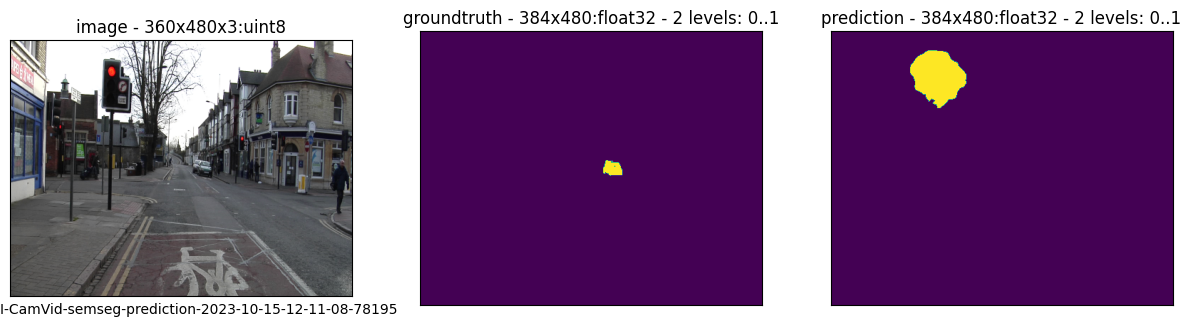

-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-prediction-2023-10-15-12-11-08-78195/predict-00002.png


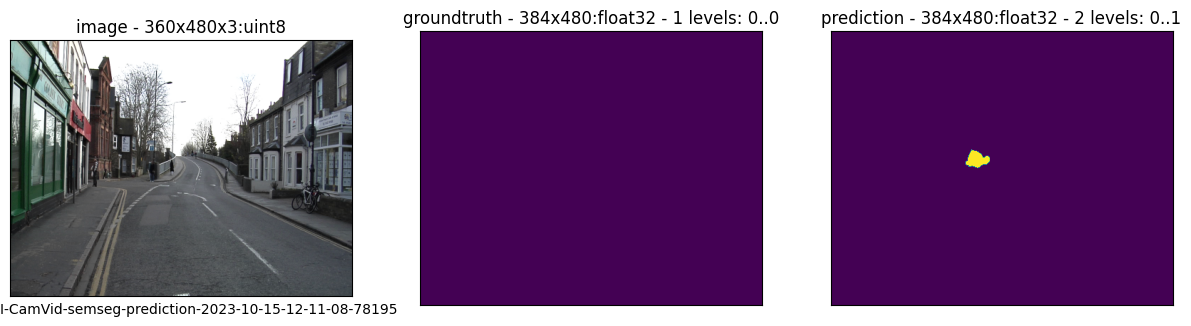

-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-prediction-2023-10-15-12-11-08-78195/predict-00007.png


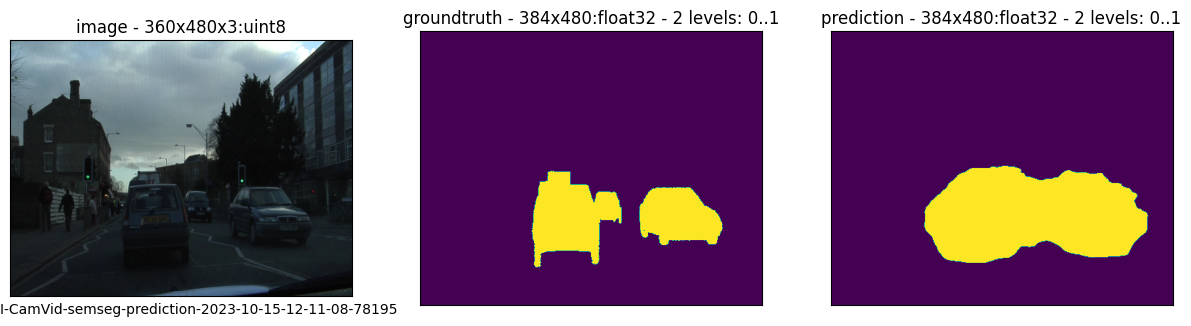

-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-prediction-2023-10-15-12-11-08-78195/predict-00005.png


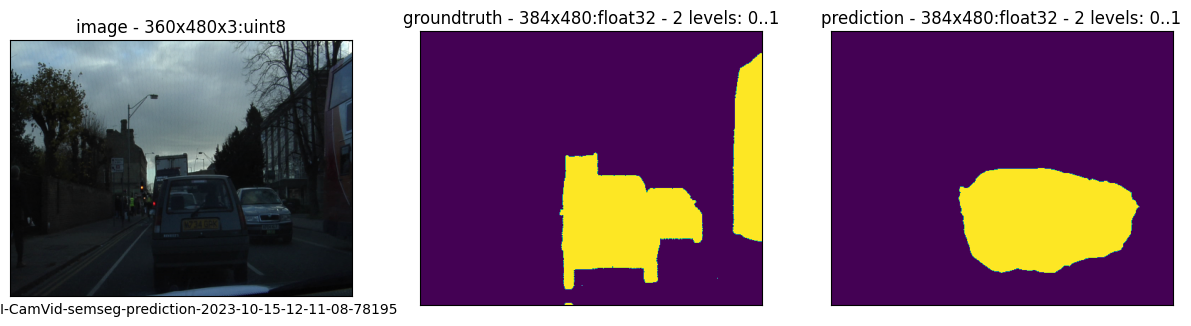

-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-prediction-2023-10-15-12-11-08-78195/predict-00011.png


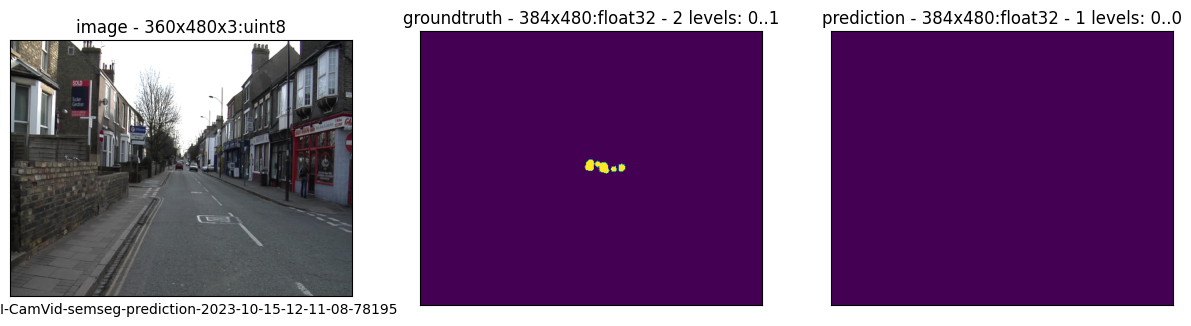

In [3]:
run_prediction(
    model_path=objects.object_path(model_object),
    dataset_path=objects.object_path(dataset_object),
    prediction_path=objects.object_path(prediction_object),
    device="cpu",
    profile=profile,
    in_notebook=True,
);

In [4]:
%%bash -s $profile $prediction_object
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

profile=$1
prediction_object=$2

if [[ "$profile" == Profile.FULL ]] ; then
    abcli upload object $prediction_object
fi

In [5]:
seed.log(prediction_object)

abcli select roofAI-CamVid-semseg-prediction-2023-10-15-12-11-08-78195; open .


In [6]:
# END